# CSC478 - Assignment 2: Part 2

## Classification using scikit-learn [Dataset: bank_data.csv]

#### For this problem you will experiment with various classifiers provided as part of the scikit-learn (sklearn) machine learning module, as well as with some of its preprocessing and model evaluation capabilities.  [Note: This module is already part of the Anaconda distributions. However, if you are using standalone Python distributions, you will need to first obtain and install it]. You will work with a modified subset of a real data set of customers for a bank. This is the same data set used in Assignment 1. The data is provided in a CSV formatted file with the first row containing the attribute names. The description of the the different fields in the data are provided in this document.



## a) Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split).

In [1]:
pwd

'/Users/Bru/Desktop/MS-PA/Spring2017/CSC478-ML/CSC478 - Assignments/HW2'

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
bank_df = pd.read_csv('bank_data.csv', index_col=0)
bank_df.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [5]:
bank_df.shape

(600, 11)

In [6]:
bank_df_x = bank_df[['age','income','children','gender','region','married','car','savings_acct','current_acct','mortgage']]
bank_df_x.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
id,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [7]:
bank_df_y = bank_df[['pep']]
bank_df_y.head()

,pep
id,
ID12101,YES
ID12102,NO
ID12103,NO
ID12104,NO
ID12105,NO


In [9]:
# converting to Standard Spreadsheet format 
bank_ssf = pd.get_dummies(bank_df_x, columns = ['gender','region','married','car','savings_acct','current_acct','mortgage'])
bank_ssf.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12101,48,17546.0,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
ID12102,40,30085.1,3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
ID12103,51,16575.4,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12104,23,20375.4,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
ID12105,57,50576.3,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


Next, we divide the data into randomized training and test partitions (note that the same split should also be performed on the target attribute). The easiest way to do this is to use the "train_test_split" module of "sklearn.cross_validation".

In [11]:
from sklearn.cross_validation import train_test_split  

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(bank_ssf, bank_df_y , test_size=0.20, random_state=42)

In [13]:
X_train.shape

(480, 19)

In [14]:
X_test.shape

(120, 19)

In [15]:
y_train.shape

(480, 1)

In [16]:
y_test.shape

(120, 1)

In [17]:
X_train.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12246,58,51204.2,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
ID12110,54,24212.1,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12476,41,20866.3,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12624,34,16291.0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
ID12289,38,34866.9,2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [18]:
y_train.head()

,pep
id,
ID12246,YES
ID12110,NO
ID12476,NO
ID12624,NO
ID12289,NO


## b) Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you must first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, computing the average accuracy score. Experiment with different values of K and the weight parameter for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion what parameters worked best).

Normalizing using the preprocessing module in sklearn

In [22]:
from sklearn import preprocessing

train_bank_N = preprocessing.MinMaxScaler().fit_transform(X_train)
test_bank_N = preprocessing.MinMaxScaler().fit_transform(X_test)

In [27]:
np.set_printoptions(precision=2, linewidth=80, suppress=True)
train_bank_N[0:5]

array([[ 0.82,  0.79,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ],
       [ 0.73,  0.33,  0.67,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.47,  0.27,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.33,  0.19,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ],
       [ 0.41,  0.51,  0.67,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ]])

In [28]:
test_bank_N[0:5]

array([[ 0.37,  0.57,  0.67,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.8 ,  0.27,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 0.24,  0.33,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  1.  ,  0.  ],
       [ 0.88,  0.8 ,  0.33,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 0.86,  0.94,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ]])

In [34]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier

bank_knn = KNeighborsClassifier(n_neighbors=4, algorithm='auto', metric='euclidean')
bank_knn.fit(train_bank_N,y_train)

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [37]:
bank_predict_y = bank_knn.predict(test_bank_N)
bank_predict_y

array(['NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO',
       'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO'], dtype=object)

In [38]:
#Classification report 
from sklearn.metrics import classification_report

print(classification_report(y_test, bank_predict_y))

             precision    recall  f1-score   support

         NO       0.64      0.88      0.74        66
        YES       0.73      0.41      0.52        54

avg / total       0.68      0.67      0.64       120



[[58  8]
 [32 22]]


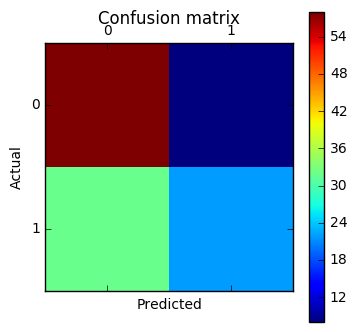

In [39]:
#Confusion matrix and visualization using matplotlib

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)

print(knn_confusion_matrix)

plt.matshow(knn_confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [40]:
# Average Accuracy Score (over test data)
bank_knn.score(test_bank_N,y_test)

0.66666666666666663

In [41]:
# Average Accuracy Score (over train data)
bank_knn.score(train_bank_N,y_train)

0.76666666666666672

In [42]:
# Changing K values
#K = 3
bank_knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', metric='euclidean')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.66      0.74      0.70        66
        YES       0.63      0.54      0.58        54

avg / total       0.65      0.65      0.65       120

[[49 17]
 [25 29]]
Accuracy on test data:0.65
Accuracy on training data:1.0


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [46]:
#K=7
bank_knn = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', metric='euclidean')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.68      0.76      0.72        66
        YES       0.66      0.57      0.61        54

avg / total       0.67      0.68      0.67       120

[[50 16]
 [23 31]]
Accuracy on test data:0.675
Accuracy on training data:1.0


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [44]:
#K=10
bank_knn = KNeighborsClassifier(n_neighbors = 10, weights = 'distance', metric='euclidean')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.64      0.71      0.67        66
        YES       0.59      0.50      0.54        54

avg / total       0.61      0.62      0.61       120

[[47 19]
 [27 27]]
Accuracy on test data:0.616666666667
Accuracy on training data:1.0


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [45]:
#K=8
bank_knn = KNeighborsClassifier(n_neighbors = 8, weights = 'distance', metric='euclidean')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.65      0.70      0.67        66
        YES       0.59      0.54      0.56        54

avg / total       0.62      0.62      0.62       120

[[46 20]
 [25 29]]
Accuracy on test data:0.625
Accuracy on training data:1.0


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [47]:
#K=13
bank_knn = KNeighborsClassifier(n_neighbors = 13, weights = 'distance', metric='euclidean')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.69      0.77      0.73        66
        YES       0.67      0.57      0.62        54

avg / total       0.68      0.68      0.68       120

[[51 15]
 [23 31]]
Accuracy on test data:0.683333333333
Accuracy on training data:1.0


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [48]:
#K=15
bank_knn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance', metric='euclidean')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.65      0.73      0.69        66
        YES       0.61      0.52      0.56        54

avg / total       0.63      0.63      0.63       120

[[48 18]
 [26 28]]
Accuracy on test data:0.633333333333
Accuracy on training data:1.0


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


Changing the value of K in the model parameters we can see that the maximum accuracy achieved on test data is 68.3% or 0.683 for k = 13

Changing the value of weight to 'uniform'

In [50]:
bank_knn = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric='euclidean')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.64      0.71      0.68        66
        YES       0.60      0.52      0.55        54

avg / total       0.62      0.62      0.62       120

[[47 19]
 [26 28]]
Accuracy on test data:0.625
Accuracy on training data:0.802083333333


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [52]:
bank_knn = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform', metric='euclidean')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.72      0.73      0.72        66
        YES       0.66      0.65      0.65        54

avg / total       0.69      0.69      0.69       120

[[48 18]
 [19 35]]
Accuracy on test data:0.691666666667
Accuracy on training data:0.74375


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [53]:
bank_knn = KNeighborsClassifier(n_neighbors = 10, weights = 'uniform', metric='euclidean')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.65      0.83      0.73        66
        YES       0.69      0.46      0.56        54

avg / total       0.67      0.67      0.65       120

[[55 11]
 [29 25]]
Accuracy on test data:0.666666666667
Accuracy on training data:0.741666666667


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [54]:
bank_knn = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform', metric='euclidean')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.70      0.79      0.74        66
        YES       0.70      0.59      0.64        54

avg / total       0.70      0.70      0.70       120

[[52 14]
 [22 32]]
Accuracy on test data:0.7
Accuracy on training data:0.747916666667


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [55]:
bank_knn = KNeighborsClassifier(n_neighbors = 15, weights = 'uniform', metric='euclidean')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.69      0.77      0.73        66
        YES       0.67      0.57      0.62        54

avg / total       0.68      0.68      0.68       120

[[51 15]
 [23 31]]
Accuracy on test data:0.683333333333
Accuracy on training data:0.739583333333


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


Changing the value of weights param to 'uniform', the highest average accuracy achieved on test data is 0.7 for k = 13

Changing the weight parameter

In [57]:
bank_knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', metric='manhattan')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.66      0.74      0.70        66
        YES       0.63      0.54      0.58        54

avg / total       0.65      0.65      0.65       120

[[49 17]
 [25 29]]
Accuracy on test data:0.65
Accuracy on training data:1.0


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [58]:
bank_knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', metric='manhattan')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.67      0.76      0.71        66
        YES       0.64      0.54      0.59        54

avg / total       0.66      0.66      0.65       120

[[50 16]
 [25 29]]
Accuracy on test data:0.658333333333
Accuracy on training data:1.0


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [59]:
bank_knn = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', metric='manhattan')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.67      0.74      0.71        66
        YES       0.64      0.56      0.59        54

avg / total       0.66      0.66      0.66       120

[[49 17]
 [24 30]]
Accuracy on test data:0.658333333333
Accuracy on training data:1.0


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [60]:
bank_knn = KNeighborsClassifier(n_neighbors = 10, weights = 'distance', metric='manhattan')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.67      0.77      0.72        66
        YES       0.66      0.54      0.59        54

avg / total       0.67      0.67      0.66       120

[[51 15]
 [25 29]]
Accuracy on test data:0.666666666667
Accuracy on training data:1.0


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [61]:
bank_knn = KNeighborsClassifier(n_neighbors = 13, weights = 'distance', metric='manhattan')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.65      0.79      0.71        66
        YES       0.65      0.48      0.55        54

avg / total       0.65      0.65      0.64       120

[[52 14]
 [28 26]]
Accuracy on test data:0.65
Accuracy on training data:1.0


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [62]:
bank_knn = KNeighborsClassifier(n_neighbors = 15, weights = 'distance', metric='manhattan')
bank_knn.fit(train_bank_N,y_train)
bank_predict_y = bank_knn.predict(test_bank_N)

from sklearn.metrics import classification_report
print(classification_report(y_test, bank_predict_y))

from sklearn.metrics import confusion_matrix
knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = bank_predict_y)
print(knn_confusion_matrix)

print("Accuracy on test data:" + str(bank_knn.score(test_bank_N,y_test)))
print("Accuracy on training data:" + str(bank_knn.score(train_bank_N,y_train)))

             precision    recall  f1-score   support

         NO       0.66      0.77      0.71        66
        YES       0.65      0.52      0.58        54

avg / total       0.66      0.66      0.65       120

[[51 15]
 [26 28]]
Accuracy on test data:0.658333333333
Accuracy on training data:1.0


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


#### Accuracy seems to increase with 'euclidean' distance.. The overall maximum accuracy achieved is for k = 13 i.e 70% or 0.70

## c) Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy score for each classifier. For each model, compare the average accuracry scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

In [63]:
#Decision tree classifier  - scikit-learn (default paramters)
from sklearn.tree import tree

treeclf = tree.DecisionTreeClassifier(random_state = 9)
#Fit the model to the training data
treeclf = treeclf.fit(train_bank_N, y_train)

treepreds_test = treeclf.predict(test_bank_N)

In [64]:
#Accuracy on testing data

print (treeclf.score(test_bank_N, y_test))

0.85


In [65]:
#Accuracy on training data
print(treeclf.score(train_bank_N,y_train))

1.0


In [66]:
print(classification_report(y_test, treepreds_test))

             precision    recall  f1-score   support

         NO       0.86      0.86      0.86        66
        YES       0.83      0.83      0.83        54

avg / total       0.85      0.85      0.85       120



[[57  9]
 [ 9 45]]


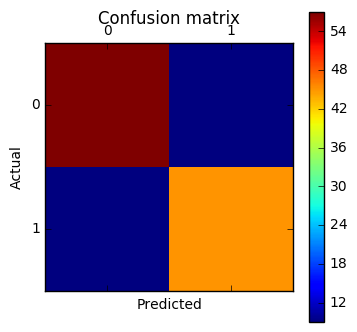

In [68]:
from sklearn.metrics import confusion_matrix

dTree_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = treepreds_test)

print(dTree_confusion_matrix)

plt.matshow(dTree_confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [69]:
#Decision tree with modified parameters

treeclf = tree.DecisionTreeClassifier(min_samples_leaf = 12, random_state = 9)
#Fit the model to the training data
treeclf = treeclf.fit(train_bank_N, y_train)
print ("Accuracy on test data",treeclf.score(test_bank_N, y_test))
print ("Accuracy on train data",treeclf.score(train_bank_N, y_train))
print(classification_report(y_test, treepreds_test))

Accuracy on test data 0.85
Accuracy on train data 0.866666666667
             precision    recall  f1-score   support

         NO       0.86      0.86      0.86        66
        YES       0.83      0.83      0.83        54

avg / total       0.85      0.85      0.85       120



In [70]:
#Decision tree with modified parameters

treeclf = tree.DecisionTreeClassifier(min_samples_leaf = 50, random_state = 9)
#Fit the model to the training data
treeclf = treeclf.fit(train_bank_N, y_train)
print ("Accuracy on test data",treeclf.score(test_bank_N, y_test))
print ("Accuracy on train data",treeclf.score(train_bank_N, y_train))
print(classification_report(y_test, treepreds_test))

Accuracy on test data 0.775
Accuracy on train data 0.760416666667
             precision    recall  f1-score   support

         NO       0.86      0.86      0.86        66
        YES       0.83      0.83      0.83        54

avg / total       0.85      0.85      0.85       120



ANALYSIS:
If we keep the default parameters, that is minimum samples per leaf value to be 1 (very complex tree), we can see that we are getting 100% accuracy on training data but accuracy on testing data comes out to be 80% which shows that we are overfitting the data in our model and it performs very well on training set but its performance goes down on testing data and training and testing accuracies are not within acceptables ranges (more than 10% difference).

So here we can see that the accuracy we get using decision tree when we change one of its parameters (min_samples_leaf = 12), is 85.0% on testing data and 85.00% on training data, so testing and training accuracy are within acceptable ranges (less than 10% difference) and there is no bias-variance trade off or in other words underfitting or overfitting.

If we keep the miminum samples per leaf value to be high and equal to 50 (comparitively simple tree), we can see that the accuracy on both testing and training comes down to around 77.5% and 76.04%, which is probably we are underfitting the data and keeping the models too simple, which is resulting into high bias, which can cause an algorithm to miss the relevant relations between features and target outputs (in other words underfitting).

In [71]:
#(Gaussian) naive Bayes classifier
from sklearn import naive_bayes

nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(train_bank_N, y_train)
nbpreds_test = nbclf.predict(test_bank_N)

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
#Accuracy on testing data
print (nbclf.score(test_bank_N, y_test))


0.566666666667


In [73]:
#Accuracy on training data
print (nbclf.score(train_bank_N, y_train))

0.677083333333


In [74]:
print(classification_report(y_test, nbpreds_test))

             precision    recall  f1-score   support

         NO       0.61      0.59      0.60        66
        YES       0.52      0.54      0.53        54

avg / total       0.57      0.57      0.57       120



[[39 27]
 [25 29]]


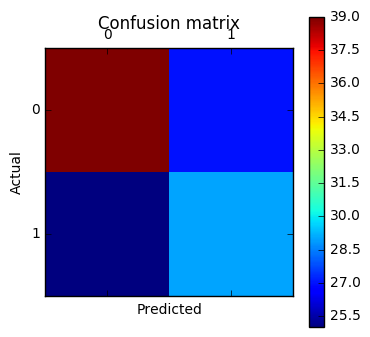

In [76]:
from sklearn.metrics import confusion_matrix

nb_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = nbpreds_test)

print(nb_confusion_matrix)

plt.matshow(nb_confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

So here we can see that the accuracy we get using naive bayes, is 57% on testing data and 67.7% on training data, so testing and training accuracy are within acceptable ranges (has around 10% difference) and there might be some overfitting.

## d) Discuss your observations based on the above experiments.

From the above experiments, it can be seen that the Decision Tree classifier works best on this given dataset in the task of classifying the records into whether they will buy PEP or not. The accuracy for decision tree with modified parameters comes out to be 85% on testing data where as the peak accuracy achieved using k Nearest Neighbour classifier is around 70% for k=13 and Naive Bayes classifier with 57% accuracy on testing data.

Also by tweaking the parameters of the k Nearest Neighbour classifier we observed that:

1) Changing the value of K in the model parameters we can see that the maximum accuracy achieved on test data is 68.3% or 0.683 for k = 13.
2) Changing the value of weights param to 'uniform', the highest average accuracy achieved on test data is 0.7 for k = 13
3) Changing the value of distance metric in the model parameters we can see that the maximum accuracy we achieve on test data is 66.66% or 0.6666 for k = 11 and then it starts decreasing. So maximum accuracy achieved using "manhattan" distance is slightly more than what we achieved using "euclidean", so we can say for classification in this dataset manhattan seems to have better accuracy than euclidean.

Modifying the parameters of decision tree we were able to see bias-variance trade off and how model underfits and overfits.